# Laboratorio 1 - Visión por Computadora

- Diego Estuardo Lemus López - 21469
- José Pablo Kiesling Lange - 21581
- Herber Sebastián Silva Muñoz - 21764

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2 as cv

import skimage as ski
from skimage import morphology as mo

### 1 . Implementar en Python una función que haga la ecualización de histograma para una imagen en escala de grises (8 bits).

In [2]:
image_path = 'assets/valley.jpg'

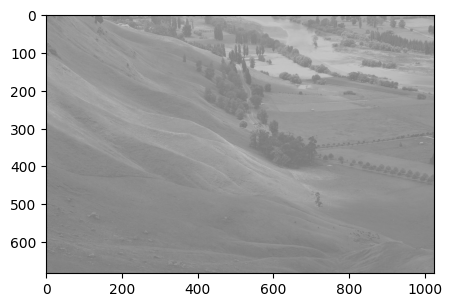

In [3]:
image = plt.imread(image_path)
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.show()

In [4]:
image = image[:,:,:3]

In [5]:
image = ski.color.rgb2gray(image)

In [6]:
image = (image * 255).astype(np.uint8)

In [7]:
def plot_histogram(image, title):
    hist, bins = np.histogram(image, bins=256, range=(0, 255))
    pixnum = image.shape[0] * image.shape[1]
    cdf = hist.cumsum() / pixnum

    fig, ax = plt.subplots()
    ax.bar(bins[:-1], hist / hist.max())
    ax.plot(bins[:-1], cdf, c='orange')
    ax.set_title(title)

    return fig, ax 

C:\Users\TheKi\AppData\Local\Temp\ipykernel_33400\1578363423.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


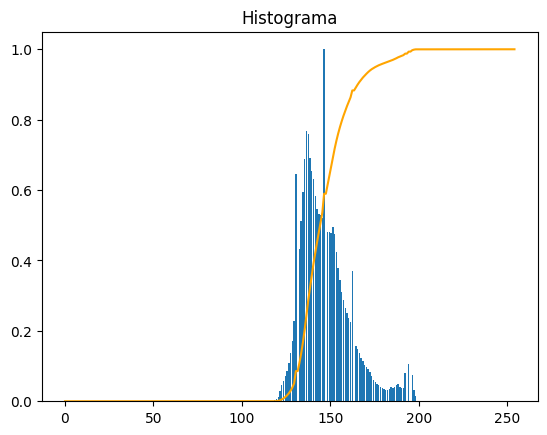

In [8]:
fig, ax = plot_histogram(image, "Histograma")
fig.show()

#### Equalización de la imagen

In [9]:
def equalize_image(image):
    hist, _ = np.histogram(image, bins=256, range=(0, 255))
    pixnum = image.shape[0] * image.shape[1]
    cdf = hist.cumsum() / pixnum
    cdf = (cdf * 255).astype(np.uint8)
    
    return cdf[image]

In [10]:
image_equalized = equalize_image(image)

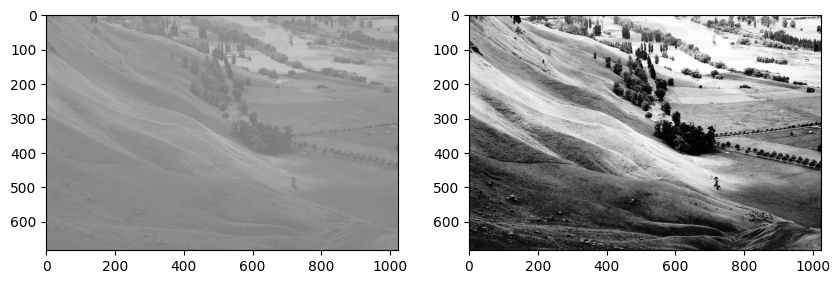

In [11]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,2,2)
plt.imshow(image_equalized, cmap='gray', vmin=0, vmax=255)

plt.show()

C:\Users\TheKi\AppData\Local\Temp\ipykernel_33400\47380211.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


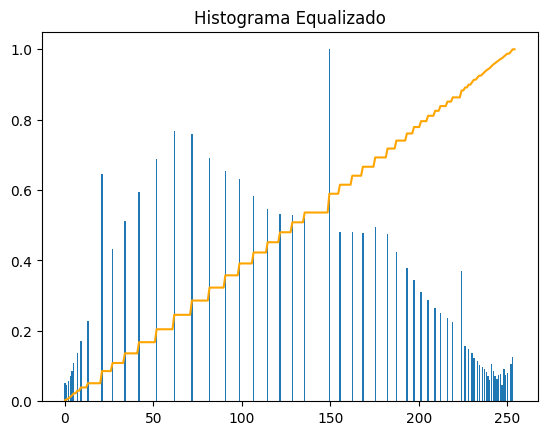

In [12]:
fig, ax = plot_histogram(image_equalized, "Histograma Equalizado")
fig.show()

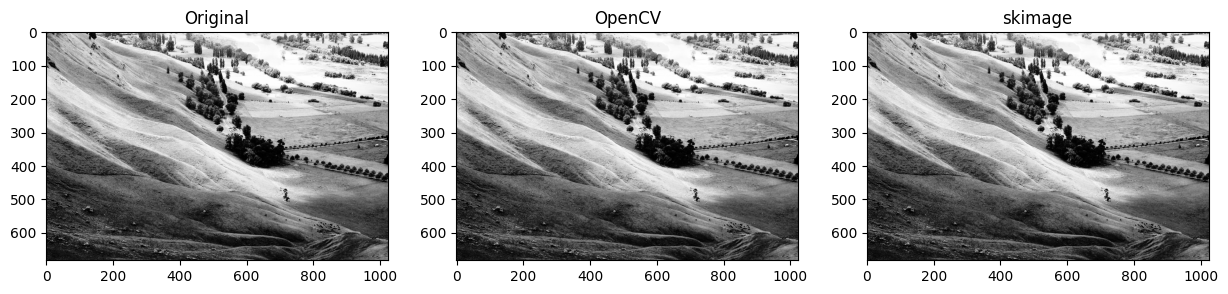

In [13]:
plt.figure(figsize=(15,5))

# Original
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(image_equalized, cmap='gray', vmin=0, vmax=255)

# OpenCV
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
image_equalized = cv.equalizeHist(image)
plt.subplot(1,3,2)
plt.title("OpenCV")
plt.imshow(image_equalized, cmap='gray', vmin=0, vmax=255)

# skimage
image = ski.io.imread(image_path, as_gray=True)
image_equalized = ski.exposure.equalize_hist(image)
plt.subplot(1,3,3)
plt.title("skimage")
plt.imshow(image_equalized, cmap='gray', vmin=0, vmax=1)

plt.show()

### 5. Implemente un algoritmo de segmentación binaria que identifique correctamente todos los granos de arroz en la imagen rice.png. (No se puede aplicar un método local.)


#### Método de Riddler-Calvard

In [14]:
import numpy as np

def otsu_threshold(image):
    hist, _ = np.histogram(image, bins=256, range=(0, 255))
    pixnum = image.shape[0] * image.shape[1]
    
    prob = hist / pixnum

    max_var = 0
    threshold = 0

    sum_all = np.sum(np.arange(256) * prob)
    sum_background = 0
    sum_foreground = sum_all
    background = 0
    foreground = 1

    for t in range(1, 255):
        background += prob[t-1]
        foreground -= prob[t-1]

        if background == 0 or foreground == 0:
            continue
        
        sum_background += (t - 1) * prob[t - 1]
        sum_foreground -= (t - 1) * prob[t - 1]

        m0 = sum_background / background if background != 0 else 0
        m1 = sum_foreground / foreground if foreground != 0 else 0

        var = background * foreground * (m0 - m1) ** 2

        if var > max_var:
            max_var = var
            threshold = t

    return threshold


In [15]:
image_path = 'assets/rice.jpg'
image = plt.imread(image_path)
image_original = image

In [16]:
image = image[:,:,:3]

In [17]:
image = ski.color.rgb2gray(image)

In [18]:
image = (image * 255).astype(np.uint8)

#### Equalización de la imagen

In [19]:
image_equalized = equalize_image(image)

#### Cuantización de la imagen (3)

In [20]:
N = 3
k = 256 // N
image_quantized = (image_equalized // k) * k

#### Segmentación binaria

In [21]:
threshold = otsu_threshold(image_quantized)
image_segmented = image_quantized > threshold

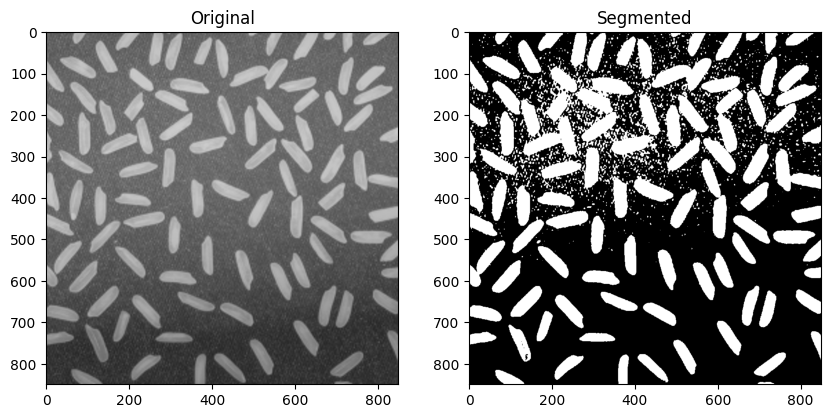

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_original, cmap='gray')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(image_segmented, cmap='gray')
plt.title("Segmented")
plt.show()

#### Operaciones morfológicas (opening para eliminar ruido)

In [23]:
disk = mo.diamond(4)
image_open = mo.binary_opening(image_segmented, disk)

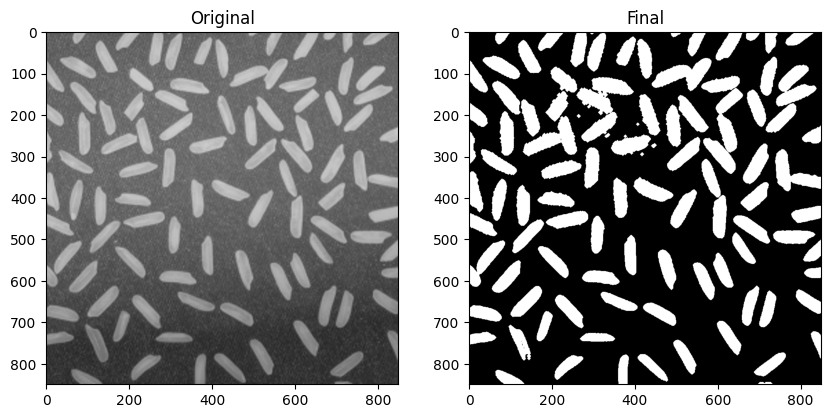

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_original, cmap='gray')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(image_open, cmap='gray')
plt.title("Final")
plt.show()